In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier

In [86]:
# !pip install imbalanced-learn

In [87]:
df = pd.read_csv('./data/BankChurners.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

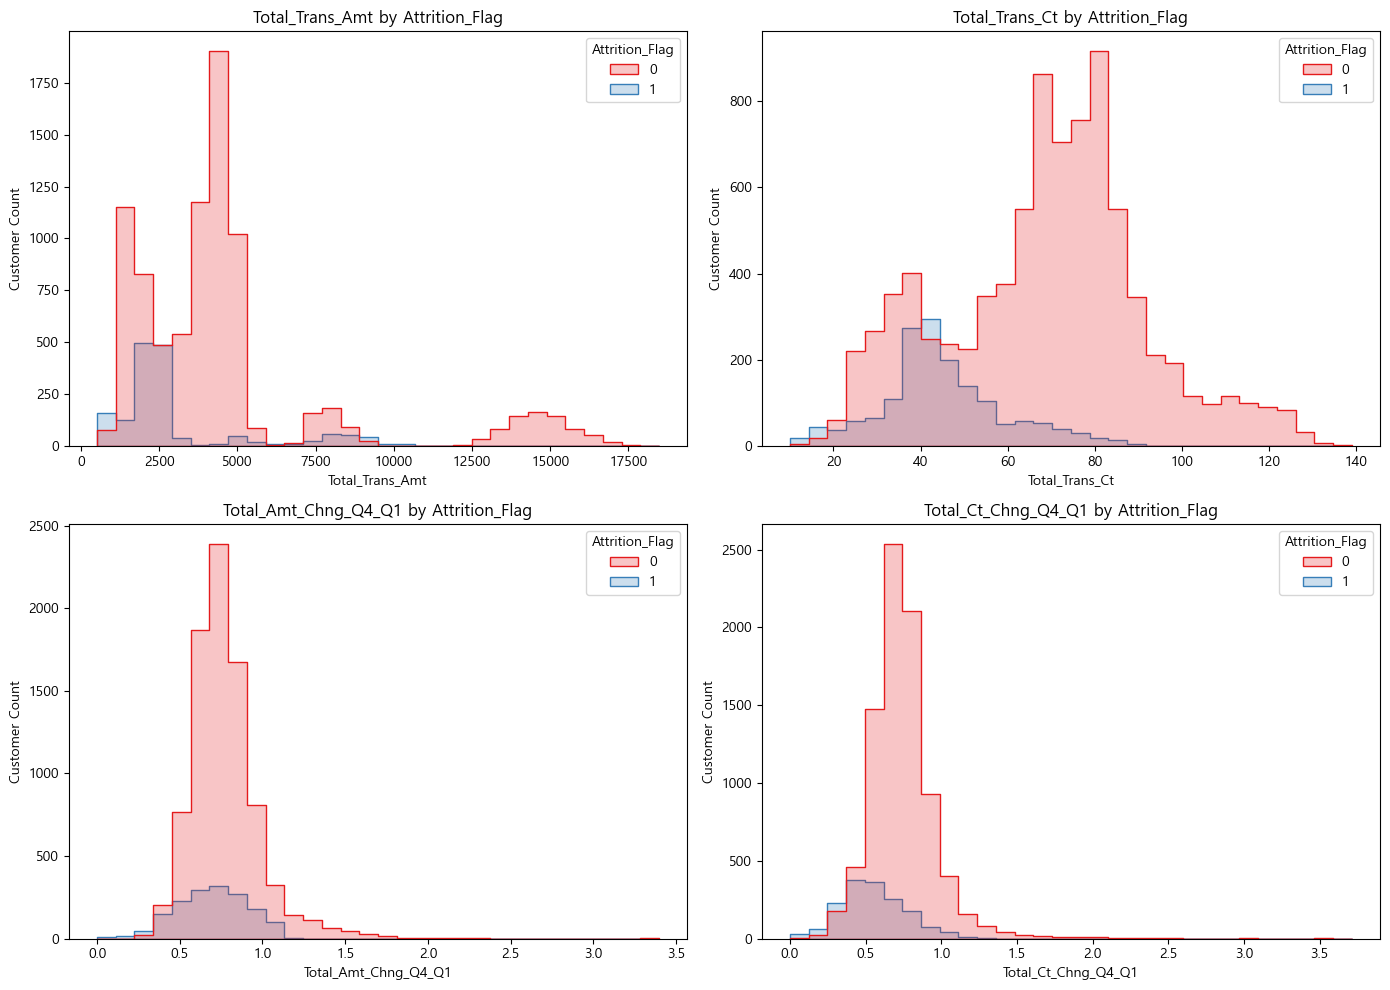

In [88]:
# 칼럼 별 타겟 간 비율 비교
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기 및 전처리
df = pd.read_csv("./data/BankChurners.csv")
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

# 사용할 컬럼
features = ['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']

# 수치형 변환 및 결측치 제거
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna(subset=features)

# 시각화: histplot (타겟별 분포 비교)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

for ax, feature in zip(axs.flat, features):
    sns.histplot(
        data=df,
        x=feature,
        hue='Attrition_Flag',
        bins=30,
        kde=False,
        element='step',
        stat='count',
        common_norm=False,
        palette='Set1',
        ax=ax
    )
    ax.set_title(f'{feature} by Attrition_Flag')
    ax.set_xlabel(feature)
    ax.set_ylabel('Customer Count')

plt.tight_layout()
plt.show()


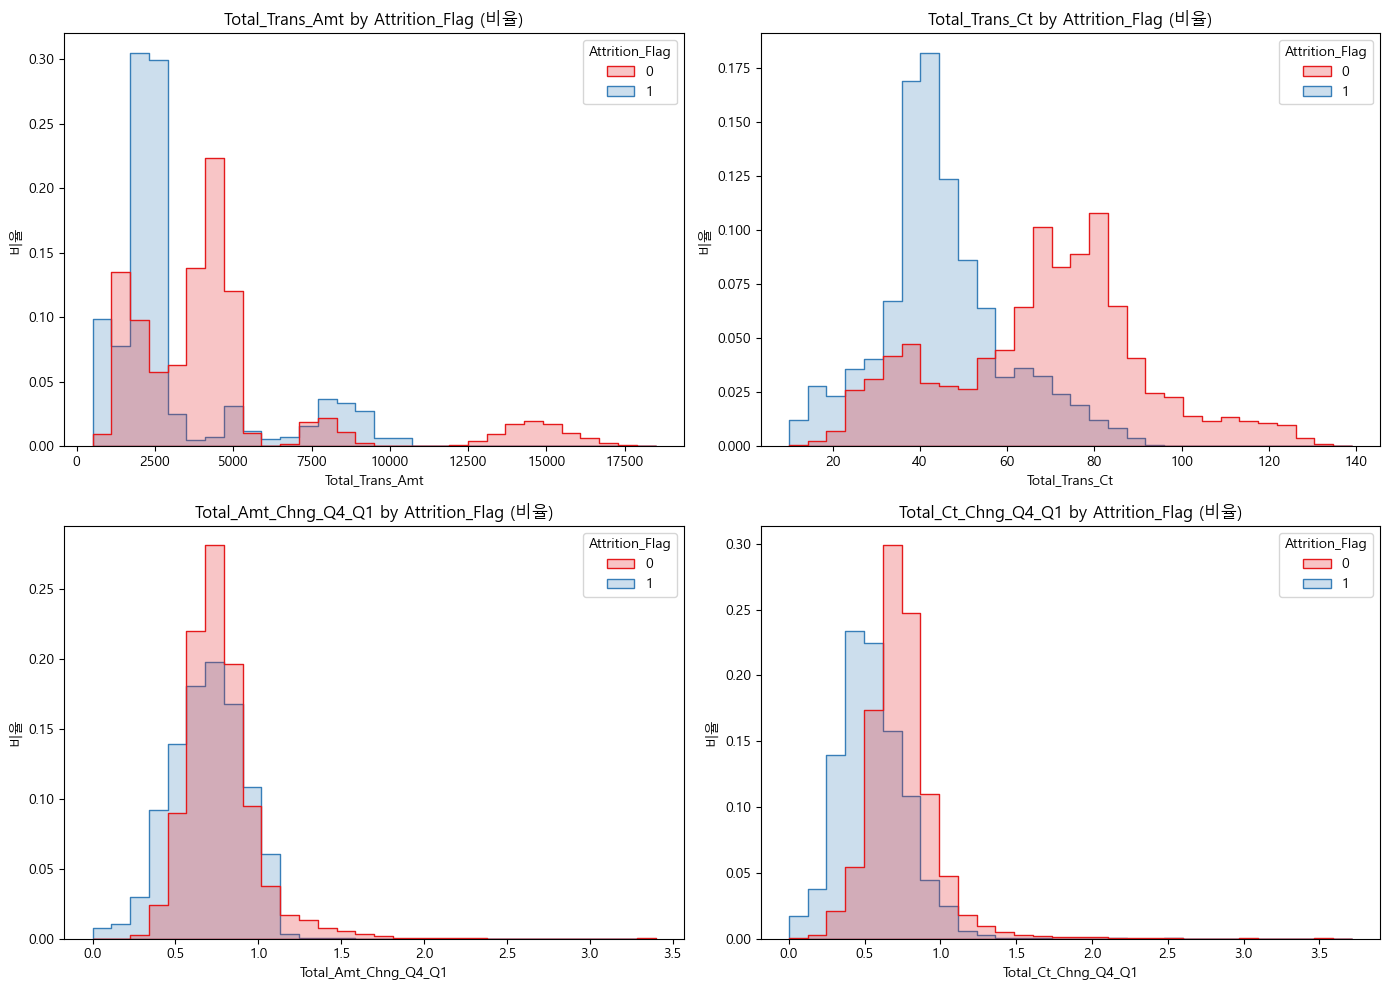

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기준 한글 폰트
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기 및 전처리
df = pd.read_csv("./data/BankChurners.csv")
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

# 사용할 피처들
features = ['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']

# 수치형 변환 및 결측치 제거
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna(subset=features)

# 시각화
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

for ax, feature in zip(axs.flat, features):
    sns.histplot(
        data=df,
        x=feature,
        hue='Attrition_Flag',      # 이탈 여부에 따라 색상 구분
        bins=30,
        kde=False,
        element='step',            # 선형 히스토그램 (겹쳐 보기 좋음)
        stat='probability',        # 확률(비율) 기준
        common_norm=False,         # 클래스별 개별 정규화
        palette='Set1',
        ax=ax
    )
    ax.set_title(f'{feature} by Attrition_Flag (비율)')
    ax.set_xlabel(feature)
    ax.set_ylabel('비율')

plt.tight_layout()
plt.show()


In [90]:
# 사용할 열 추출
df = pd.read_csv("./data/BankChurners.csv")
features = ['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Attrition_Flag']
df_model = df[features].copy()

# 타겟 인코딩 ('Attrited Customer' → 1, 'Existing Customer' → 0)
df_model['Attrition_Flag'] = df_model['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

# 수치형 변환 및 결측치 제거
for col in features:
    df_model[col] = pd.to_numeric(df_model[col], errors='coerce')
df_model = df_model.dropna()

# 스케일링
scale_columns = ['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']

scaler = StandardScaler()
df[scale_columns] = scaler.fit_transform(df[scale_columns])

# X, y 나누기
X = df_model.drop(columns='Attrition_Flag')
y = df_model['Attrition_Flag']

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 모델 정의
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# 학습
lr_model.fit(X_train, y_train)

# 예측
y_pred_lr = lr_model.predict(X_test)

# 평가 출력
print("Logistic Regression 결과:")
print(classification_report(y_test, y_pred_lr, digits=4))

Logistic Regression 결과:
              precision    recall  f1-score   support

           0     0.8738    0.9494    0.9100      1699
           1     0.5222    0.2875    0.3708       327

    accuracy                         0.8425      2026
   macro avg     0.6980    0.6184    0.6404      2026
weighted avg     0.8170    0.8425    0.8230      2026



In [92]:
from sklearn.ensemble import RandomForestClassifier

# 모델 정의
rf_model = RandomForestClassifier(random_state=42)

# 학습
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)

# 평가 출력
print("Random Forest 결과:")
print(classification_report(y_test, y_pred_rf, digits=4))


Random Forest 결과:
              precision    recall  f1-score   support

           0     0.9548    0.9706    0.9626      1699
           1     0.8328    0.7615    0.7955       327

    accuracy                         0.9368      2026
   macro avg     0.8938    0.8660    0.8791      2026
weighted avg     0.9351    0.9368    0.9357      2026



In [93]:
from xgboost import XGBClassifier

# 모델 정의 
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=100,       # 기본 100 → 50으로 줄여 속도 개선
    max_depth=3,           # 깊이 제한
    random_state=42
)

# 학습
xgb_model.fit(X_train, y_train)

# 예측
y_pred_xgb = xgb_model.predict(X_test)

# 평가 출력
print("XGBoost 결과:")
print(classification_report(y_test, y_pred_xgb, digits=4))

XGBoost 결과:
              precision    recall  f1-score   support

           0     0.9553    0.9676    0.9614      1699
           1     0.8197    0.7645    0.7911       327

    accuracy                         0.9348      2026
   macro avg     0.8875    0.8661    0.8763      2026
weighted avg     0.9334    0.9348    0.9339      2026



c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:37:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [94]:
# 모델 선정
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

# 모델 학습 및 평가
for name, model in models.items():
    model.fit(X_train, y_train)    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # ROC-AUC 계산을 위한 확률값
    
    # 평가 지표 출력
    print(f"{name} ==========")
    print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision : {precision_score(y_test, y_pred):.4f}")
    print(f"Recall : {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score : {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC : {roc_auc_score(y_test, y_pred_proba):.4f}")
    print(f"\nClassification Report\n{classification_report(y_test, y_pred)}")

    # 특성 중요도 확인
    if (name == 'Logistic Regression'):
        coef_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
        print("\nFeature Coefficients\n", coef_importance.sort_values(by='Coefficient', ascending=False))
    else:
        feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
        print("\nFeature Importance\n", feature_importance.sort_values(by='Importance', ascending=False))

    print("\n" + "="*100 + "\n")

Logistic Regression ==========
Accuracy : 0.8425
Precision : 0.5222
Recall : 0.2875
F1 Score : 0.3708
ROC-AUC : 0.8611

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1699
           1       0.52      0.29      0.37       327

    accuracy                           0.84      2026
   macro avg       0.70      0.62      0.64      2026
weighted avg       0.82      0.84      0.82      2026


Feature Coefficients
                 Feature  Coefficient
0       Total_Trans_Amt     0.000437
1        Total_Trans_Ct    -0.098461
2  Total_Amt_Chng_Q4_Q1    -0.597023
3   Total_Ct_Chng_Q4_Q1    -2.970429


Random Forest ==========
Accuracy : 0.9368
Precision : 0.8328
Recall : 0.7615
F1 Score : 0.7955
ROC-AUC : 0.9686

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1699
           1       0.83      0.76      0.80       327

    accuracy         

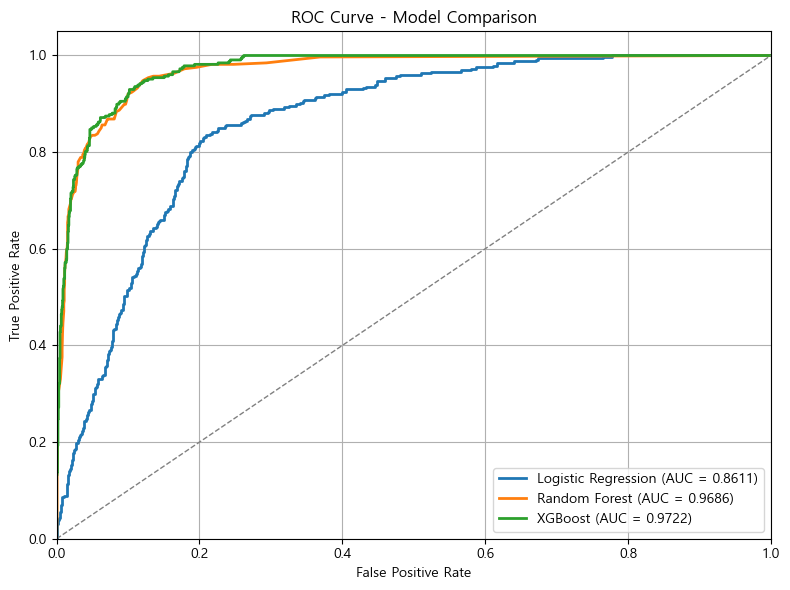

In [95]:
from sklearn.metrics import roc_curve, auc
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', n_estimators=50, max_depth=3, random_state=42)
}

# 3. ROC Curve 시각화
plt.figure(figsize=(8, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.4f})')

# 대각선 기준선 추가
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)

# 그래프 세부 설정
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [97]:
# 오버샘플링 적용
smote = SMOTE(random_state=42)
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)

# 모델 선정
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

# 파라미터 설정
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10],              # 규제 강도
        'penalty': ['l1', 'l2'],               # 규제 유형
        'solver': ['liblinear']                # l1과 l2 모두 지원하는 solver
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],                 # 트리 개수
        'max_depth': [10, 20],                          # 최대 깊이
        'min_samples_split': [2, 5, 10],                # 노드 분할 최소 샘플 : 값이 클수록 트리가 덜 복잡해져 과적합을 줄이는 효과
        'min_samples_leaf': [1, 2, 4],                  # 리프 노드 최소 샘플 : 값이 크면 모델이 단순 (클래스 불균형이 심하면 크게 설정)
        'max_features': ['sqrt', 'log2', 0.3, 0.5],     # 특성 샘플링 비율 : 각 트리에서 사용할 특성의 최대 개수 (무작위성을 높여 모델의 다양성을 증가)
        # 'class_weight' : ['balanced']                   # 클래스 가중치 : 클래스 불균형을 해결하기 위해 클래스에 가중치를 부여
    },
    "XGBoost": {
        'n_estimators': [50, 100, 200],                 # 트리 개수
        'max_depth': [3, 6, 10],                        # 최대 깊이 : XGBoost는 깊이가 얕아도 잘 작동한다!
        'learning_rate': [0.01, 0.05, 0.1, 0.3],        # 학습률
        'subsample': [0.6, 0.8, 1.0],                   # 각 트리 학습에 사용할 데이터 샘플 비율 : 값이 낮을수록 과적합 방지
    },
    "LightGBM": {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20],  
        'learning_rate': [0.01, 0.05, 0.1, 0.3],
        'num_leaves': [20, 31, 50],                     # 한 트리의 최대 리프 노드 수 : 2^(max_depth)보다 작아야 과적합을 줄이는 데 유리
        'reg_lambda' : [0.1, 1.0]                       # L2 규제 : 과적합을 방지하고 모델을 안정화
    },
}

# 모델 학습 및 평가
for name, model in models.items():
    # 파라미터 학습
    print(f"\nGridSearchCV Search Best Params for {name}..............................")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring='f1', n_jobs=-1, verbose=1)
    grid_search.fit(X_train_resample, y_train_resample)
    
    # 최적 모델 선정
    best_model = grid_search.best_estimator_
    print(f">>>> Best Parameters for {name}\n{grid_search.best_params_}")
    
    # 교차 검증
    print(f"Cross Val Score : {cross_val_score(best_model, X_train_resample, y_train_resample, scoring='f1', cv=5)}")

    # 예측
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # ROC-AUC 계산을 위한 확률값
    
    # 평가 지표 출력
    print(f"{name} ==========")
    print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision : {precision_score(y_test, y_pred):.4f}")
    print(f"Recall : {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score : {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC : {roc_auc_score(y_test, y_pred_proba):.4f}")    
    print(f"\n>>>> Classification Report\n{classification_report(y_test, y_pred)}")

    # 특성 중요도 확인
    if (name == "Logistic Regression"):
        coef_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': best_model.coef_[0]})
        print("\n>>>> Feature Coefficients\n", coef_importance.sort_values(by='Coefficient', ascending=False))
    else:
        feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': best_model.feature_importances_})
        print("\n>>>> Feature Importance\n", feature_importance.sort_values(by='Importance', ascending=False))

    print("\n" + "="*100 + "\n")


GridSearchCV Search Best Params for Logistic Regression..............................
Fitting 5 folds for each of 8 candidates, totalling 40 fits
>>>> Best Parameters for Logistic Regression
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Cross Val Score : [0.80557594 0.83078019 0.83787661 0.83511777 0.84742196]
Logistic Regression ==========
Accuracy : 0.8006
Precision : 0.4374
Recall : 0.8226
F1 Score : 0.5711
ROC-AUC : 0.8592

>>>> Classification Report
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      1699
           1       0.44      0.82      0.57       327

    accuracy                           0.80      2026
   macro avg       0.70      0.81      0.72      2026
weighted avg       0.87      0.80      0.82      2026


>>>> Feature Coefficients
                 Feature  Coefficient
0       Total_Trans_Amt     0.000562
1        Total_Trans_Ct    -0.126267
2  Total_Amt_Chng_Q4_Q1    -0.663832
3   Total_Ct_Chng_Q4_Q1    -2.97

c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\subprocess.py", line 1028, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\subproces

[LightGBM] [Info] Number of positive: 6801, number of negative: 6801
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000483 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 890
[LightGBM] [Info] Number of data points in the train set: 13602, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
>>>> Best Parameters for LightGBM
{'learning_rate': 0.3, 'max_depth': 20, 'n_estimators': 200, 'num_leaves': 31, 'reg_lambda': 0.1}
[LightGBM] [Info] Number of positive: 5441, number of negative: 5440
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 890
[LightGBM] [Info] Number of data points in the train set: 10881, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500046 -> initscore=0.00018